In [1]:
# Mount
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/CS7643-project/scripts"
%load_ext autoreload
%autoreload 2

/content/drive/.shortcut-targets-by-id/1xF6535u4rFTdu6RjWzY8tTNa5vPgSP5s/CS7643-project/scripts


In [3]:
# Install required packages
%cd "/content/drive/MyDrive/CS7643-project/scripts"
!pip install -r requirements.txt

/content/drive/.shortcut-targets-by-id/1xF6535u4rFTdu6RjWzY8tTNa5vPgSP5s/CS7643-project/scripts
     |████████████████████████████████| 42 kB 884 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 31.2 MB 1.2 MB/s 
     |████████████████████████████████| 130 kB 60.7 MB/s 
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=156423 sha256=57afc7eacd791787ad222a704afc5ad9965db58f07ce39b1bd76c5ba04485137
  Stored in directory: /root/.cache/pip/wheels/c9/c0/d4/29d797817e268124a32b6cf8beb8b8fe87b86f099d5a049e61
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5710 sha256=315ad5f81c4118584f3ca485e15a25d0a626e3f2637feb04b68c03177af4a838
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
  Created wheel for torchwordemb: filename=torchwordemb-0.0.9-cp37-cp37m-linu

In [ ]:
from data_loader import ImagerLoader
import torch.utils.data
import torchvision.transforms as transforms

In [ ]:
train_loader = torch.utils.data.DataLoader(
    ImagerLoader('../data/images/',
                 transforms.Compose([
                     transforms.Scale(256),
                     transforms.CenterCrop(256),
                     transforms.RandomCrop(224),
                     transforms.RandomHorizontalFlip(),
                     transforms.ToTensor(),
                 ]), data_path='../data/', partition='train', sem_reg=False),
    batch_size=2, shuffle=False, num_workers=1, pin_memory=True
)


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [ ]:
it = iter(train_loader)
input, target = next(it)


In [ ]:
from tqdm import tqdm
white_count = 0
n = 500
for i in tqdm(range(n)):
  input, target = next(it)
  if int(input[0][0].mean()) == 1:
      white_count += 1
print("White img count: {0}".format(white_count))

100%|██████████| 500/500 [29:51<00:00,  3.58s/it]

White img count: 0


torch.Size([3, 224, 224])


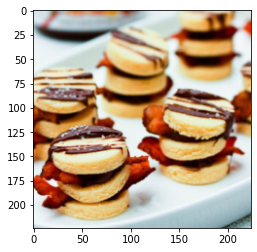

In [ ]:
import matplotlib.pyplot as plt
print(input[0][0].shape)
plt.imshow(input[0][0].permute(1, 2, 0))


In [ ]:
from recipe_model_EfficientNet import JointEmbeddingModel
model = JointEmbeddingModel()
output = model(*input)
print([output[i].shape for i in range(len(output))])


usage: ipykernel_launcher.py [-h] [-partition PARTITION]
                             [-nlosscurves NLOSSCURVES] [-epochs EPOCHS]
                             [-start_epoch START_EPOCH] [-embedding EMBEDDING]
                             [-medr MEDR] [-tsamples TSAMPLES]
                             [-maxlen MAXLEN] [-maxims MAXIMS]
                             [-imsize IMSIZE] [-batch_size BATCH_SIZE]
                             [-n_workers N_WORKERS] [-dispfreq DISPFREQ]
                             [-valfreq VALFREQ] [-patience PATIENCE]
                             [-test_feats TEST_FEATS] [-cos_weight COS_WEIGHT]
                             [-reg_weight REG_WEIGHT] [-img_train IMG_TRAIN]
                             [-txt_train TXT_TRAIN] [-lr LR]
                             [-resume_path RESUME_PATH] [-data_path DATA_PATH]
                             [-img_path IMG_PATH] [-early_stop EARLY_STOP]
                             [-seed SEED] [-f101_cats F101_CATS]
                

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved
print("Current free GPU memory: {0}".format(f))
torch.cuda.empty_cache()
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved
print("Free GPU memory after empty cache: {0}".format(f))


Current free GPU memory: 0
Free GPU memory after empty cache: 0


In [4]:
#!rm results_EfficientNet/*

!python train_EfficientNet.py -batch_size 16 -n_workers 4 \
  -epoch 100 -valfreq 1 -medr 300 -early_stop 500 -lr 0.0005 -img_feature 512 -force_save 10\
  -checkpoint_path ./snapshot_EfficientNet/ \
  -train_loss_output ./results_EfficientNet/train_loss_resnet50.txt \
  -val_loss_output ./results_EfficientNet/val_loss_resnet50.txt \
  -val_recall_output ./results_EfficientNet/val_recall_resnet50.txt \
  -resume_path ./snapshot_EfficientNet/model_epoch_079_val_79.350.pth.tar


Using GPU...
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 129MB/s]
Loading checkpoint ./snapshot_EfficientNet/model_epoch_079_val_79.350.pth.tar
Finish loading...
Training loader prepared.
Validation loader prepared.
Epoch 079, iteration      19, data loading time: 2.0647
Epoch 079, iteration      19, batch time: 2.0921
Epoch 079, iteration      39, data loading time: 0.0001
Epoch 079, iteration      39, batch time: 0.0477
Epoch 079, iteration      59, data loading time: 0.0001
Epoch 079, iteration      59, batch time: 0.0509
Epoch 079, iteration      79, data loading time: 0.0001
Epoch 079, iteration      79, batch time: 0.0462
Epoch 079, iteration      99, data loading time: 0.0001
Epoch 079, iteration      99, batch time: 0.0458
Epoch 079, iteration     119, data loading time: 0.0001
Epoch 079, iteration     119, batch time: 0.0441
Epoch 079, iteration     139, data